# Import the needed packages

In [1]:
import dataretrieval.nwis as nwis
import matplotlib.pyplot as plt
import pandas as pd

# Label the site and get records from NWIS

In [2]:
site = '02471001'
df = nwis.get_record(sites=site, service='iv', start='2001-09-02', end='2021-09-09') 
df.index = pd.to_datetime(df.index, utc=True)

In [3]:
df

,00060,00060_cd,site_no,00065,00065_cd
datetime,,,,,
2001-09-02 05:00:00+00:00,154.0,"A, [91]",02471001,NaN,NaN
2001-09-02 05:30:00+00:00,154.0,"A, [91]",02471001,NaN,NaN
2001-09-02 06:00:00+00:00,156.0,"A, [91]",02471001,NaN,NaN
2001-09-02 06:30:00+00:00,157.0,"A, [91]",02471001,NaN,NaN
2001-09-02 07:00:00+00:00,158.0,"A, [91]",02471001,NaN,NaN
...,...,...,...,...,...
2021-09-10 02:30:00+00:00,327.0,P,02471001,5.96,P
2021-09-10 03:00:00+00:00,326.0,P,02471001,5.95,P
2021-09-10 03:30:00+00:00,325.0,P,02471001,5.94,P


# set the new dataframe for discharge

In [4]:
discharge = df['00060']

In [5]:
discharge

datetime
2001-09-02 05:00:00+00:00    154.0
2001-09-02 05:30:00+00:00    154.0
2001-09-02 06:00:00+00:00    156.0
2001-09-02 06:30:00+00:00    157.0
2001-09-02 07:00:00+00:00    158.0
                             ...  
2021-09-10 02:30:00+00:00    327.0
2021-09-10 03:00:00+00:00    326.0
2021-09-10 03:30:00+00:00    325.0
2021-09-10 04:00:00+00:00    323.0
2021-09-10 04:30:00+00:00    322.0
Name: 00060, Length: 345674, dtype: float64

# PART B: Question 3 - Here is my plot of the 20 year data. 

Text(0.5, 0.98, 'Discharge - Station #02471001')

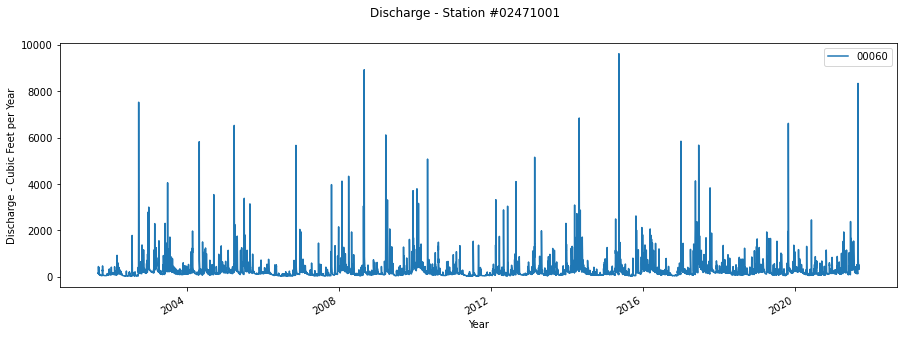

In [6]:
from matplotlib.ticker import StrMethodFormatter
fig, ax = plt.subplots()
discharge.plot(ax=ax, figsize=(15,5))
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge - Cubic Feet per Year')
fig.suptitle('Discharge - Station #02471001')

# PART C: Calculate the mean discharge for each year and find peak flows

In [7]:
years = discharge.groupby(discharge.index.year)
mean_annual_flow = pd.DataFrame(years.mean())
mean_annual_peak_flow = pd.DataFrame(years.max())

In [8]:
mean_annual_peak_flow

,00060
datetime,
2001,467.0
2002,7520.0
2003,4050.0
2004,5820.0
2005,6520.0
2006,5660.0
2007,3970.0
2008,8920.0
2009,6110.0


# Calculate 7 day annual minimums

In [9]:
weeks = discharge.resample('D').mean()

In [10]:
seven_day_annual_mins = pd.DataFrame(weeks.groupby(weeks.index.year).min())

In [11]:
seven_day_annual_mins

,00060
datetime,
2001,46.354167
2002,26.979167
2003,89.541667
2004,71.583333
2005,93.250000
2006,30.000000
2007,26.000000
2008,39.500000
2009,39.218750


# Create the plots

Text(0.5, 0.98, 'Discharge - Station #02471001')

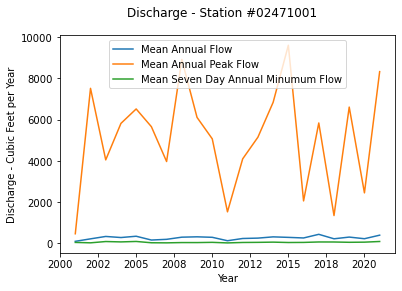

In [12]:
from matplotlib.ticker import StrMethodFormatter
fig, ax = plt.subplots()
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
mean_annual_flow['00060'].rename('Mean Annual Flow').plot(ax=ax)
mean_annual_peak_flow['00060'].rename('Mean Annual Peak Flow').plot(ax=ax)
seven_day_annual_mins['00060'].rename('Mean Seven Day Annual Minumum Flow').plot(ax=ax)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge - Cubic Feet per Year')
fig.suptitle('Discharge - Station #02471001')

## A Note:
I am noticing that the Mean Annual Flow and Mean Seven Day Annual Minimum flows are kind of hard to see. Lets plot each of these seperately to get a better look. 

Text(0.5, 0.98, 'Discharge - Station #02471001')

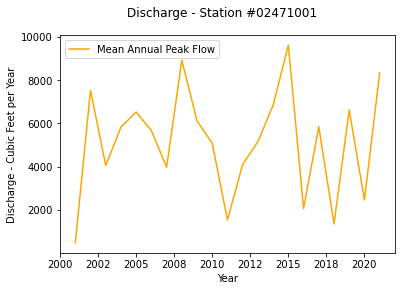

In [13]:
from matplotlib.ticker import StrMethodFormatter
fig, ax = plt.subplots()
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
mean_annual_peak_flow['00060'].rename('Mean Annual Peak Flow').plot(ax=ax, color='orange')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge - Cubic Feet per Year')
fig.suptitle('Discharge - Station #02471001')

Text(0.5, 0.98, 'Discharge - Station #02471001')

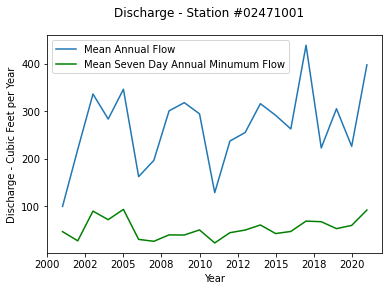

In [14]:
from matplotlib.ticker import StrMethodFormatter
fig, ax = plt.subplots()
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
mean_annual_flow['00060'].rename('Mean Annual Flow').plot(ax=ax)
seven_day_annual_mins['00060'].rename('Mean Seven Day Annual Minumum Flow').plot(ax=ax, color='green')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge - Cubic Feet per Year')
fig.suptitle('Discharge - Station #02471001')

## Part D: Calculate the Mean of Monthly Streamflows

In [15]:
months = weeks.groupby(weeks.index.month).mean()

Text(0.5, 0.98, '20 Year Mean Discharge by Month')

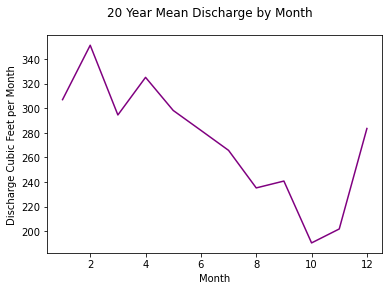

In [16]:
fig, ax = plt.subplots()
months.plot(ax=ax, color='purple')
ax.set_ylabel('Discharge Cubic Feet per Month')
ax.set_xlabel('Month')
fig.suptitle('20 Year Mean Discharge by Month')

In [19]:
mean_annual_peak_flow.reset_index().mean()

datetime    2011.000000
00060       5141.761905
dtype: float64

In [20]:
seven_day_annual_mins.reset_index().min()

datetime    2001.000000
00060         22.591667
dtype: float64

# Discussion
The first figure in part B shows discharge over a 20 year period from September of 2001 to September of 2021 for gauge #0247100 in Chicasaw Alabama. The second figure in part C compares annual peak, minimum and 7 day means. I found it hard to interpret the graph for this section due to the difference in scales. When I broke them apart and analyzed them, I found the mean annual flow and the minimum annual flow to be closer in values as shown in the final graph of part C. Therefore, for this gauge, I think it is important to analyze the data in seperate graphs so that the three variables can be understood by their appropriate scales. 

Overall, the largest mean annual peak flow was found in 2011 at a total of 5141 cubic feet per year. 2011 also saw the lowest seven day annual minimum of 22 cubic foot per year. 

The seasonality graph in part D is quite interesting, showing that in the early months there is higher flow rates of water and it steadily decreases over time. 